In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
inputPath = '/kaggle/input/digit-recognizer/train.csv'
data = pd.read_csv(inputPath)

data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
np.random.shuffle(data)
m, n = data.shape
print(m,n)
#42000 labels  and 784 pixel values for each label
dataDev = data[0:1000].T
yDev = dataDev[0]
xDev = dataDev[1:]
#development set is used to validate the learning.

dataTrain = data[1000:].T
yTrain = dataTrain[0]
xTrain = dataTrain[1:]
xTrain = xTrain / 255.0 #normalize the set
xDev = xDev / 255.0

#The neural network architecture
#x1 ---- N1---        -----  O1
#x2(fully    (output         ..(10 probability classes)
#connected      is a 
#layer)       probability
#..`          distribution)
#xn------Nn------     -------O10

#1 input layer     1 hidden layer    1 output layer

42000 785


In [4]:
def ReLU(z):
    return np.maximum(z,0)

def softmax(z):
    c = np.max(z, axis=0, keepdims=True)
    exp = np.exp(z - c)
    return exp / np.sum(exp, axis=0, keepdims=True)

def ReLU_der(z):
    return z>0

In [5]:
def init_params():
    w1 = np.random.rand(10,784)-0.5 #for 10 neurons in the hidden layer..mean centered at 1
    w2 = np.random.rand(10,10)-0.5
    b1 = np.random.rand(10,1)-0.5
    b2 = np.random.rand(10,1)-0.5
    
    return w1, w2, b1, b2
    
def forwardProp(w1,w2,b1,b2,x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)

    return z1, z2, a1, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y] = 1 
    return one_hot_y.T
    
def backProp(z1, z2, a1 ,a2, x, y, w2):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1/m)*dz2.dot(a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * ReLU_der(z1)
    dw1 = (1/m)*dz1.dot(x.T) 
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return db2,db1,dw2,dw1

def updateParams(db2,db1,dw2,dw1,w1,w2,b1,b2,alpha):
    w1 = w1 - alpha*dw1
    w2 = w2 - alpha*dw2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return w1,w2,b1,b2
    
def getPrediction(a2):
    return np.argmax(a2,0)

def getAccuracy(predictions,y):
    print("Example preds:", predictions[:10])
    print("True labels: ", y[:10])
    return np.sum(predictions == y)/y.size
    
def gradientDescent(x,y,iterations,alpha):
    w1,w2,b1,b2 = init_params()
    for i in range(iterations):
        z1,z2,a1,a2 = forwardProp(w1,w2,b1,b2,x)
        db2,db1,dw2,dw1 = backProp(z1,z2,a1,a2,x,y,w2)
        w1,w2,b1,b2 = updateParams(db2,db1,dw2,dw1,w1,w2,b1,b2,alpha)

        if i%10 == 0:
            print("iteration: ",i)
            print("Accuracy: ",getAccuracy(getPrediction(a2),y))
    return w1,w2,b1,b2


In [6]:
w1,w2,b1,b2 = gradientDescent(xTrain,yTrain,1000,0.05)

iteration:  0
Example preds: [3 8 8 3 9 8 0 8 0 8]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.05214634146341463
iteration:  10
Example preds: [4 8 0 3 0 4 0 9 0 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.0893170731707317
iteration:  20
Example preds: [4 6 0 3 0 4 0 0 0 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.13834146341463416
iteration:  30
Example preds: [4 6 0 3 0 4 0 0 0 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.18753658536585366
iteration:  40
Example preds: [4 6 0 3 0 4 0 0 4 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.21926829268292683
iteration:  50
Example preds: [4 6 0 3 0 4 0 0 4 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.25739024390243903
iteration:  60
Example preds: [4 6 0 3 0 4 0 0 4 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.3073658536585366
iteration:  70
Example preds: [1 6 0 3 0 4 6 0 4 0]
True labels:  [5 3 0 9 0 9 6 0 2 2]
Accuracy:  0.3460243902439024
iteration:  80
Example preds: [1 6 0 3 0 4 6 0 4 0]


In [7]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forwardProp(w1, w2, b1, b2, x)
    predictions = getPrediction(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = xTrain[:, index, None]  # shape (784,1)
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = yTrain[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshape and scale back to 28x28 grayscale image for visualization
    current_image_reshaped = current_image.reshape((28, 28)) * 255
    
    plt.gray()
    plt.imshow(current_image_reshaped, interpolation='nearest')
    plt.show()


Prediction:  [3]
Label:  3


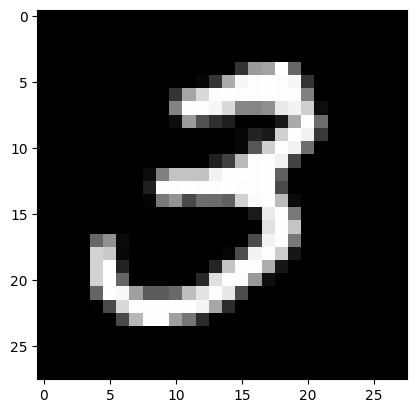

In [8]:
test_prediction(1, w1, b1, w2, b2)